# EDA and Cleaning - Ames Housing Data

This notebook contains all data cleaning and Exploratory Data Analysis performed on Ames Housing Data

## Initial comments from data description review

- "There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). **I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations)** before assigning it to students."

- "... if the purpose is to once again create a common use model to estimate a “typical” sale, it is in the modeler’s best interest to remove any observations that do not seem typical **(such as foreclosures or family sales)**."

## Interesting features after reading data description:

- Lot Shape
- Land Contour
- Lot Config
- Neighborhood
- Year Built
- Year Remod/Add
- Exter Qual
- Exter Cond
- Overall Qual
- Overall Cond
- Gr Liv Area
- Bedroom
- KitchenQual
- Garage Area
- Garage Qual
- Garage Cond
- Mo Sold
- Yr Sold
- Sale Type
- Sale Condition

In [1]:
# Import the usual suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import data
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [3]:
# List interesting features from reading data description
interesting = [
    'Lot Shape',
    'Land Contour',
    'Lot Config',
    'Neighborhood',
    'Year Built',
    'Year Remod/Add',
    'Exter Qual',
    'Exter Cond',
    'Overall Qual',
    'Overall Cond',
    'Gr Liv Area',
    'Bedroom AbvGr',
    'Kitchen Qual',
    'Garage Area',
    'Garage Qual',
    'Garage Cond',
    'Mo Sold',
    'Yr Sold',
    'Sale Type',
    'SalePrice',
]

In [6]:
# Keep only interesting features
train = train[interesting]


In [7]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [8]:
# Check nulls and dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Shape       2051 non-null   object 
 1   Land Contour    2051 non-null   object 
 2   Lot Config      2051 non-null   object 
 3   Neighborhood    2051 non-null   object 
 4   Year Built      2051 non-null   int64  
 5   Year Remod/Add  2051 non-null   int64  
 6   Exter Qual      2051 non-null   object 
 7   Exter Cond      2051 non-null   object 
 8   Overall Qual    2051 non-null   int64  
 9   Overall Cond    2051 non-null   int64  
 10  Gr Liv Area     2051 non-null   int64  
 11  Bedroom AbvGr   2051 non-null   int64  
 12  Kitchen Qual    2051 non-null   object 
 13  Garage Area     2050 non-null   float64
 14  Garage Qual     1937 non-null   object 
 15  Garage Cond     1937 non-null   object 
 16  Mo Sold         2051 non-null   int64  
 17  Yr Sold         2051 non-null   i

### **Might be good to include a garage y/n column**

## Dropping rows with 'Gr Liv Area' > 4000 per data description suggestion.

In [9]:
train = train[train['Gr Liv Area'] < 4000]
test = test[test['Gr Liv Area'] < 4000]

''

<Figure size 720x720 with 0 Axes>

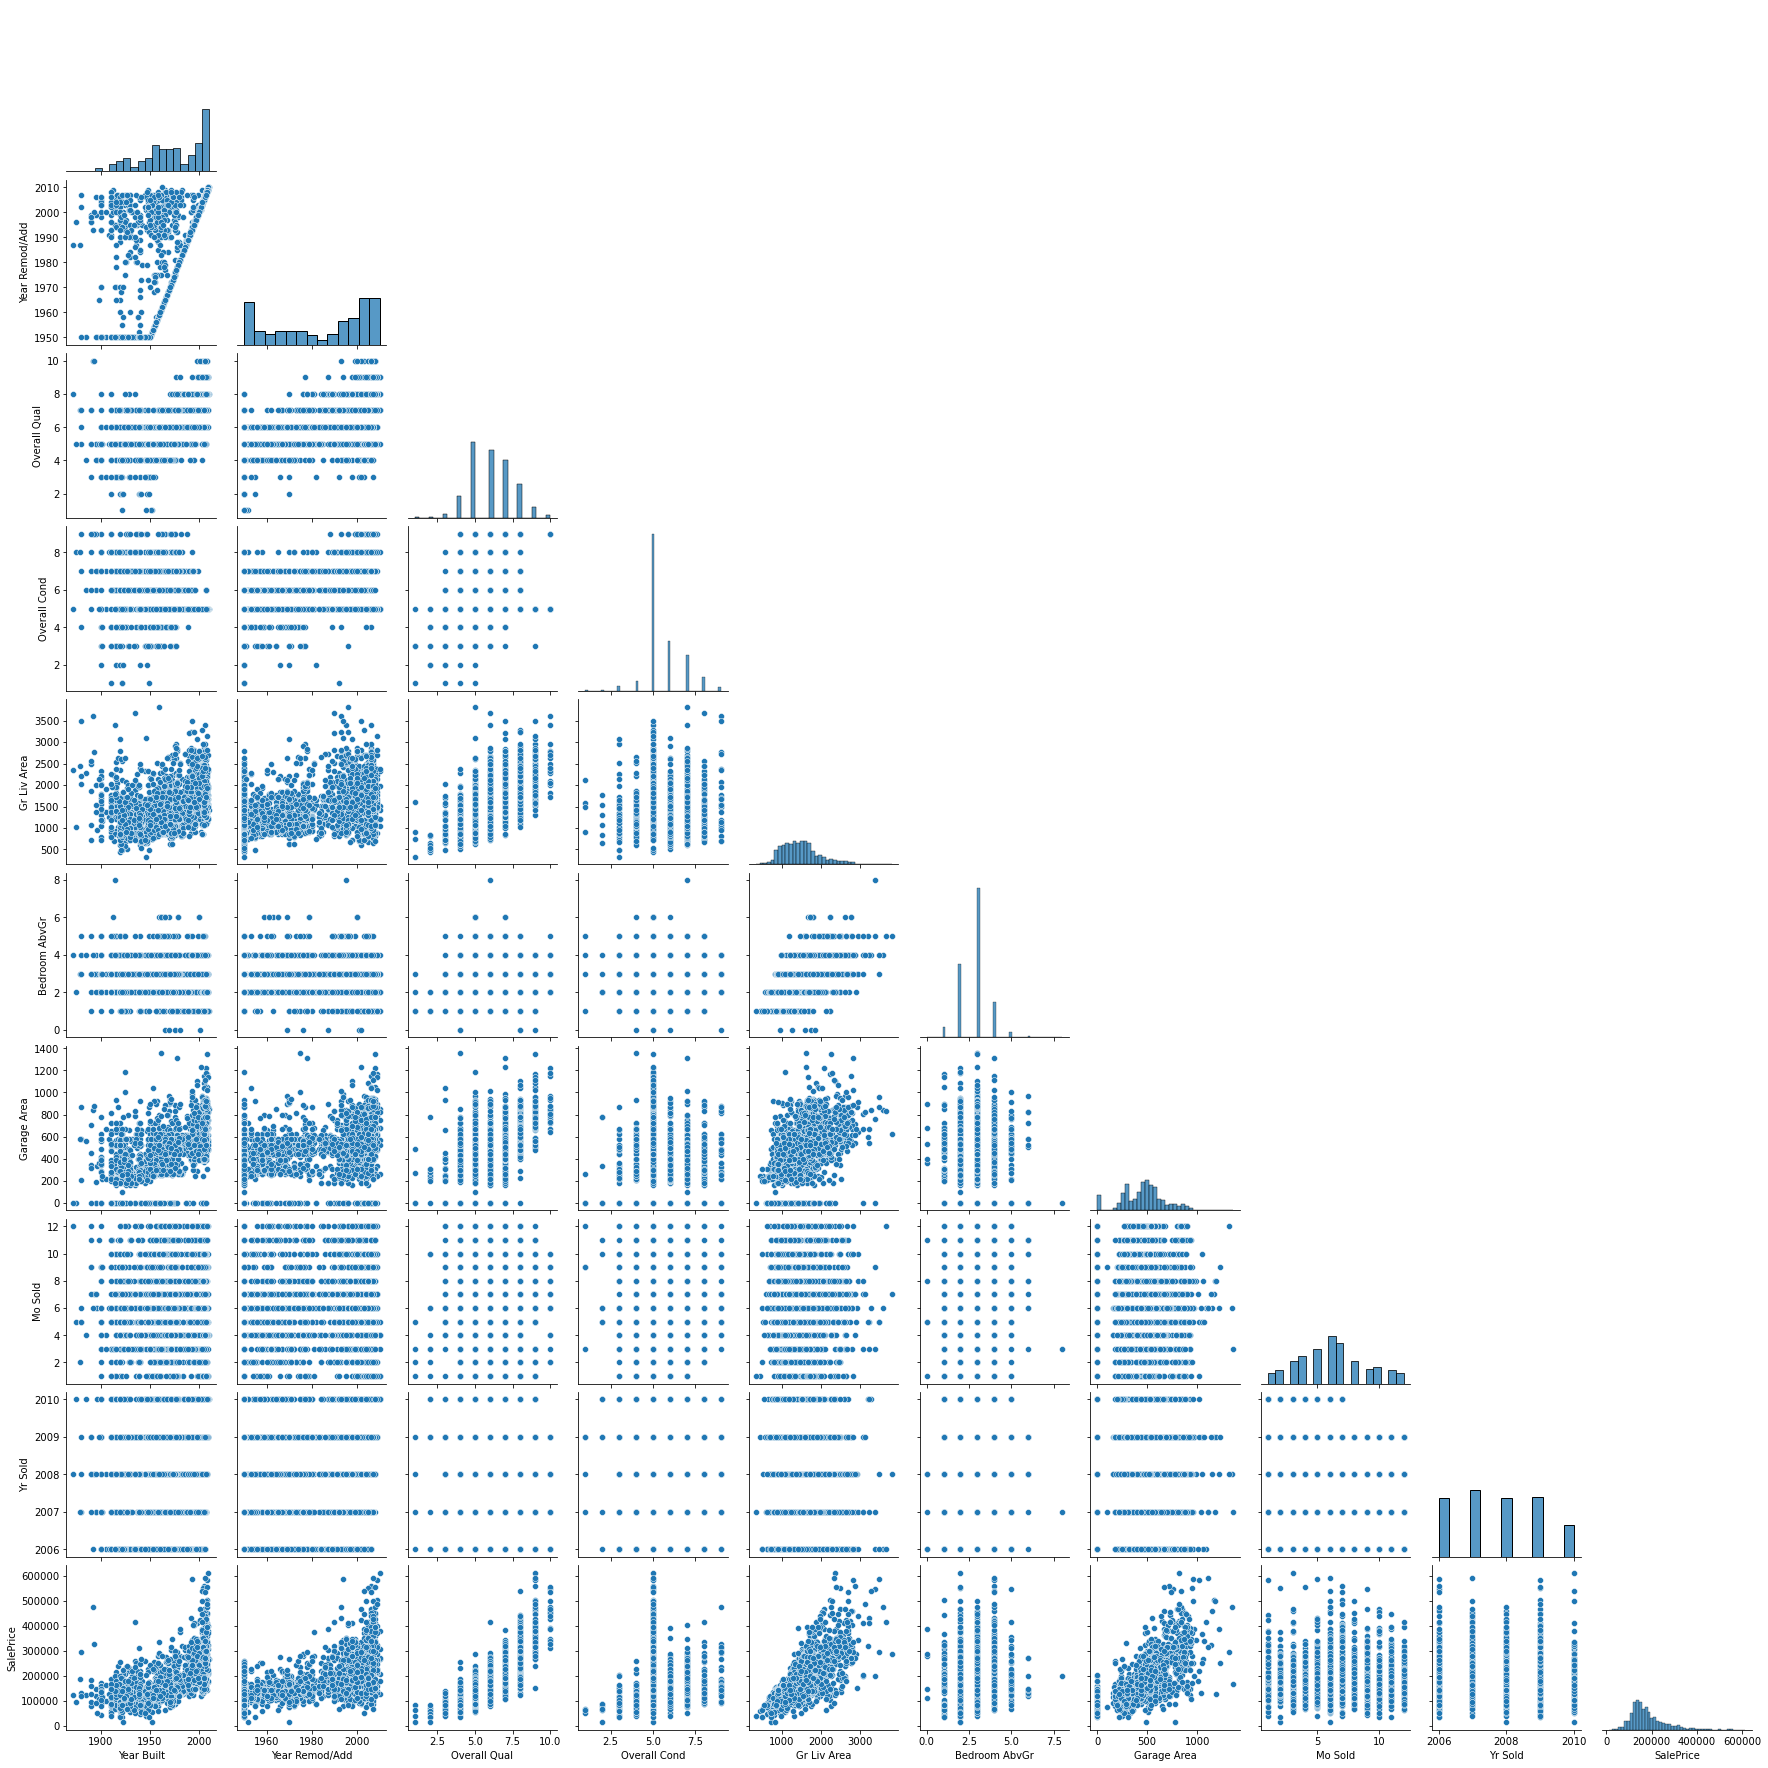

In [10]:
plt.figure(figsize=(10,10))
sns.pairplot(train, corner=True)
;

'Bedroom AbvGr', 'Mo Sold' and 'Yr Sold' seem to be evenly distributed, so I will drop them.

In [11]:
train.drop(columns=['Bedroom AbvGr', 'Mo Sold', 'Yr Sold'], inplace=True)
test.drop(columns=['Bedroom AbvGr', 'Mo Sold', 'Yr Sold'], inplace=True)

In [12]:
train.corr()

,Year Built,Year Remod/Add,Overall Qual,Overall Cond,Gr Liv Area,Garage Area,SalePrice
Year Built,1.000000,0.628613,0.602376,-0.370699,0.257605,0.486564,0.572405
Year Remod/Add,0.628613,1.000000,0.584080,0.043223,0.323532,0.397856,0.550872
Overall Qual,0.602376,0.584080,1.000000,-0.081723,0.564933,0.559804,0.803462
Overall Cond,-0.370699,0.043223,-0.081723,1.000000,-0.109227,-0.137040,-0.097093
Gr Liv Area,0.257605,0.323532,0.564933,-0.109227,1.000000,0.479815,0.719463
Garage Area,0.486564,0.397856,0.559804,-0.137040,0.479815,1.000000,0.655483
SalePrice,0.572405,0.550872,0.803462,-0.097093,0.719463,0.655483,1.000000
